# 金融工程学 第二次作业 报告
###### 林新凯 金融工程 2016312010173

给定欧式看涨期权定价公式如下：
$$
C(S_t, K, t, T, r, \sigma)=S_tN(d_1)-e^{-r(T-t)}KN(d_2))\tag{1}
$$

$$
N(d) = \frac{1}{\sqrt(2\pi)}\int_{-\infty}^{d}e^{-\frac{1}{2}x^2}dx\tag{2}
$$

$$
d_1 = \frac{\log{\frac{S_t}{K}}+(r+\frac{\sigma^2}{2})(T-t)}{\sigma\sqrt{T-t}}\tag{3}
$$

$$
d_2 = \frac{\log{\frac{S_t}{K}}+(r-\frac{\sigma^2}{2})(T-t)}{\sigma\sqrt{T-t}}\tag{4}
$$

In [78]:
# 导入所需模块。
from math import log, exp, sqrt # 对数、指数和求根运算
from scipy import stats         # 统计计算
import numpy as np              # 数值计算
import matplotlib.pyplot as plt # 作图

# 定义函数计算欧式看涨期权的价格。

class Option(object):
    
    def __init__(self, St=1, K=50, t=0, T=10, r=0.03, sigma=0.25):
        self.St = St
        self.K = K
        self.t = t
        self.T = T
        self.r = r
        self.sigma = sigma
        self.d1 = (log(St/K) + (r + sigma**2/2) * (T-t)) / (sigma * sqrt(T-t))
        self.d2 = (log(St/K) + (r - sigma**2/2) * (T-t)) / (sigma * sqrt(T-t))
        self.C = St * stats.norm.cdf(self.d1) - exp(-r * (T-t)) * K * stats.norm.cdf(self.d2)

# 1. $\Delta$
## 1.1 公式推导

期权的$\Delta$被定义为*标的资产价格变动导致的期权价格的变动*。
在数学上就是对（1）式中求$S_t$在$C$下的偏导，即：

$$\frac{\partial{C}}{\partial{S_t}} = N(d_1) + S_t N'(d_1)\frac{\partial{d_1}}{\partial{S_t}}-e^{-r(T-t)}KN'(d_2)\frac{\partial{d_2}}{\partial{S_t}}\tag{5}$$

由（3）、（4）式，有：

$$d_2 = d_1 - \sigma\sqrt{T-t}$$

从而：

$$N'(d_2) = \frac{1}{\sqrt(2\pi)}e^{-\frac{1}{2}d_2^2}$$

所以：

$$N'(d_2)=N'(d_1)e^{d_1\sigma\sqrt{T-t-\frac{1}{2}\sigma^2(T-t)}}$$

再把$d_1$的表达式代入即可得：

$$N'(d_2)=\frac{S_t}{K}N'(d_1)e^{r(T-r)}\tag{6}$$

把（6）式代入（5）式，我们可以得到表达式：

$$\frac{\partial{C}}{\partial{S_t}}=N(d_1)+S_tN'(d_1)\frac{\partial{d_1}}{\partial{S_t}}-S_tN'(d_1)\frac{\partial{d_2}}{\partial{S_t}}$$

化简之后得到最终的$\Delta$的表达式：

$$\Delta=\frac{\partial{C}}{\partial{S_t}}=N(d_1)\tag{7}$$

## 1.2 作图观察
于是我们可以根据（7）式，对于不同的$S_t$计算相应的期权价格，并作图观察其关系：

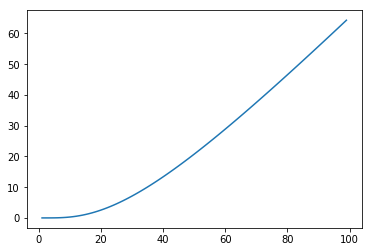

In [73]:
C1 = [Option(St).C for St in range(1, 100)]
plt.plot(range(1, 100), C1)

以及不同的$S_t$值下相应的$\Delta$值：

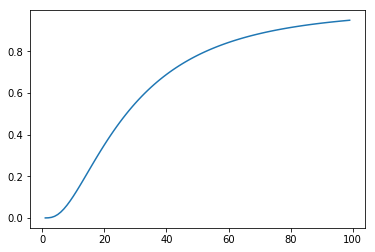

In [75]:
Delta = [stats.norm.cdf(Option(St).d1) for St in range(1, 100)]
plt.plot(range(1, 100), Delta)

# 2. $\Gamma$
## 2.1 公式推导
期权的$\Gamma$被定义为*标的价格的变动导致的$\Delta$值的变动*。在数学上就是对（7）式中求$\Delta$下$S_t$的偏导，即：

$$\frac{\partial{\Delta}}{\partial{S_t}} = N'(d_1)\frac{\partial{d_1}}{\partial{S_t}}\tag{8}$$

并且有：

$$\frac{\partial{d_1}}{\partial{S_t}} = \frac{\frac{K}{S_t}}{\sigma\sqrt{T-t}}*\frac{1}{K}=\frac{1}{\sigma S_t\sqrt{T-t}}\tag{9}$$

由（8）、（9）化简整理得：

$$\Gamma = \frac{\partial{\Delta}}{\partial{S_t}} = \frac{N'(d_1)}{\sigma S_t\sqrt{T-t}}\tag{10}$$

## 2.2 作图观察

同理，我们对不同的$S_t$值计算相对应的$\Gamma$值，观察其关系：

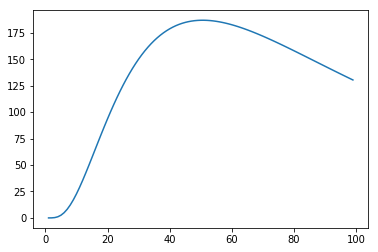

In [76]:
def gamma(St):
    option = Option(St)
    return stats.norm.pdf(option.d1) / option.sigma * option.St * sqrt(option.T - option.t)

Gamma = [gamma(St) for St in range(1, 100)]
plt.plot(range(1, 100), Gamma)

# 3. $\Theta$

## 3.1 公式推导

期权的$\Theta$被定义为*到期日的变动导致的期权价格的变动*。在数学上就是对（1）式中求$T$在$C$下的偏导，即：

$$$\Theta = \frac{\partial{C}}{\partial{T}}$

经过整理简化后得到：

$$\Theta = S_tN'(d_1)\frac{\sigma}{2\sqrt{T-t}} + re^{-r(T-t)}KN(d_2)\tag{11}$$

## 3.2 作图观察

同理，我们作图观察不同的$S_t$及相应的$\Theta$的值：

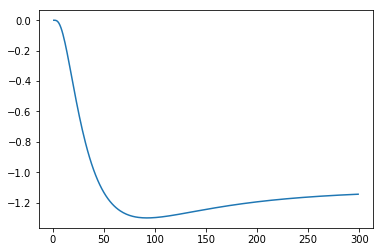

In [91]:
def theta(St):
    option = Option(St)
    return (St * stats.norm.pdf(option.d1) * option.sigma / (2*sqrt(option.T-option.t)) + \
            option.r * exp(-option.r*(option.T-option.t)) * option.K * stats.norm.cdf(option.d2))

Theta = [-x for x in [theta(St) for St in range(1, 300)]]
plt.plot(range(1, 300), Theta)

# 4. $rho$

## 4.1 公式推导

期权的$\rho$值衡量*无风险利率的变化导致的期权价格的变化*。在数学上就是对（1）式中求$r$在$C$下的偏导，即：

$$\frac{\partial{C}}{\partial{r}}= S_tN'(d_1)(\frac{\partial{d_1}}{\partial{r}} - \frac{\partial{d_2}}{\partial{r}}) + (T-t)e^{-r(T-t)}KN(d_2)\tag{12}$$

又有：

$$\frac{\partial{d_1}}{\partial{r}} = \frac{\partial{d_2}}{\partial{r}}\tag{13}$$

由（12）、（13）可得最终$rho$的表达式：

$$rho = \frac{\partial{C}}{\partial{r}} = (T-t)e^{-r(T-t)}KN(d_2)\tag{14}$$

## 4.2 作图观察

同理，我们作图观察不同的$St$及其对应的$rho$的值

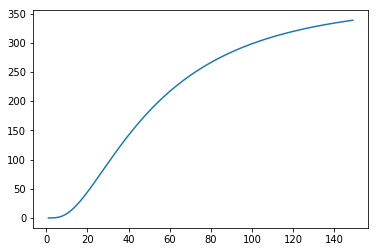

In [93]:
def rho(St):
    option = Option(St)
    return (option.T - option.t) * exp(-option.r * (option.T - option.t)) * option.K * stats.norm.cdf(option.d2)

Rho = [rho(St) for St in range(1, 150)]
plt.plot(range(1, 150), Rho)